In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.metrics import  accuracy_score, confusion_matrix, precision_score, recall_score, make_scorer, f1_score, classification_report
from sklearn.svm import SVC

In [2]:
final_dataset = pd.read_csv('cleaned_data.csv')
final_dataset.head(10)

,age,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,BMI,heartRate,glucose,male,female,target
0,-1.217670,-0.757524,-0.162324,-0.072187,-0.099863,-0.961110,-1.240737,0.361848,0.391573,-0.177185,-1.145519,1.145519,0
1,-0.397103,-0.757524,-0.162324,-0.072187,-0.099863,0.335695,-0.496956,0.832289,1.685033,-0.262482,0.872966,-0.872966,0
2,-0.162655,0.918782,-0.162324,-0.072187,-0.099863,0.217804,-0.174651,-0.073845,-0.039581,-0.774266,-1.145519,1.145519,0
3,-0.397103,1.170228,-0.162324,-0.072187,-0.099863,1.160935,-0.050687,-0.672588,0.822726,0.505193,0.872966,-0.872966,0
4,-0.748775,-0.757524,-0.162324,-0.072187,-0.099863,-0.183027,2.428583,1.251944,0.132880,1.699355,0.872966,-0.872966,0
5,-0.514327,0.918782,-0.162324,-0.072187,-0.099863,1.821127,-1.538249,-1.052148,0.305342,-0.091888,0.872966,-0.872966,0
6,0.306241,-0.757524,-0.162324,-0.072187,-0.099863,0.571478,0.519545,0.198797,0.046650,-0.006590,-1.145519,1.145519,0
7,-0.748775,1.756935,-0.162324,-0.072187,-0.099863,-0.253762,1.536046,-0.536267,1.512572,0.761085,-1.145519,1.145519,0
8,0.071793,-0.757524,-0.162324,-0.072187,-0.099863,0.430008,0.098069,-0.723374,-0.039581,-0.262482,0.872966,-0.872966,0
9,-0.748775,-0.757524,-0.162324,-0.072187,-0.099863,0.264960,-0.001102,0.540936,-0.298273,-1.541941,0.872966,-0.872966,0


<br>

### Labeling the Dataset and doing Train, Test and Split

In [3]:
X = final_dataset.drop('target', axis=1).to_numpy()
y = final_dataset.target.to_numpy()

# Train Test and Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=44)

In [4]:
clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)

SVC(class_weight='balanced')

In [5]:
y_predict = clf.predict(X_test)

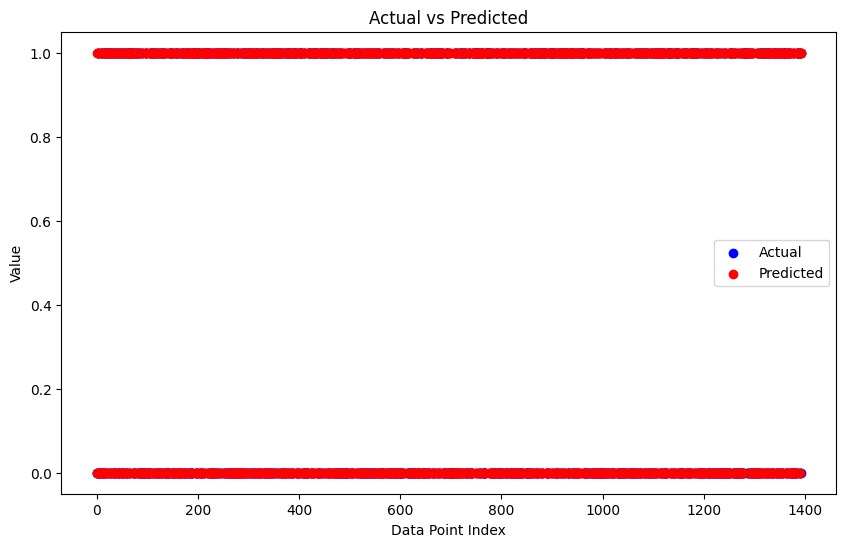

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_predict)), y_predict, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [7]:
clf.score(X_train, y_train)

0.7259831208475489

In [8]:
clf.score(X_test, y_test)

0.7207465900933238

In [9]:
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.7207465900933238


In [10]:
con_m = confusion_matrix(y_test, y_predict)

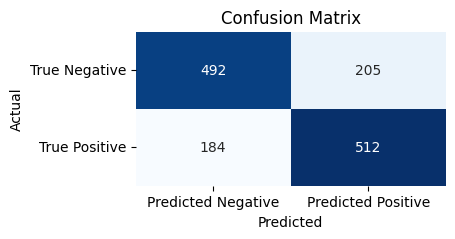

In [11]:
plt.figure(figsize=(4, 2))
sns.heatmap(con_m, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
precision = precision_score(y_test, y_predict)
print(f"Our model is {precision*100:.3f} % precised.")

Our model is 71.409 % precised.


In [13]:
recall= recall_score(y_test, y_predict)
print(f"{recall*100:.3f} %")

73.563 %


In [14]:
f1_score(y_test, y_predict)

0.7246992215145082

#### HyperParameter Tunning

In [15]:
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['poly', 'linear' ],          # Kernel type
    'degree': [2, 3, 4, 5],          # Polynomial degree
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

In [16]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'linear']},
             scoring='accuracy')

In [17]:
best_params = grid_search.best_params_

In [18]:
clf.set_params(**best_params)

SVC(C=10, class_weight='balanced', degree=5, gamma='auto', kernel='poly')

In [19]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       697
           1       0.78      0.78      0.78       696

    accuracy                           0.78      1393
   macro avg       0.78      0.78      0.78      1393
weighted avg       0.78      0.78      0.78      1393



In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.3f}")

recall = recall_score(y_test, y_pred)
print(f"\nRecall: {recall*100:.3f}")

Accuracy: 78.033

Recall: 77.586


In [22]:
cm = confusion_matrix(y_test, y_pred)

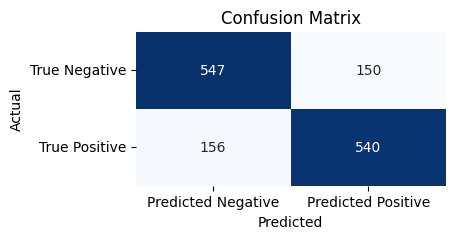

In [23]:
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
clf.score(X_train, y_train)

0.8179206320703897

In [25]:
clf.score(X_test, y_test)

0.7803302225412778